#### Tecnológico de Costa Rica
#### Escuela de Física
IF4702 - Física Computacional I\
Grupo 1\
Prof. Jose Esteban Pérez Hidalgo\
Prof. Álvaro Amador Jara

Estudiantes:
* Frandy Arroyo  2019065491
* Reiner Ureña Vega  2019061777

## Tarea semana 16: Algoritmos genéticos

### 1. Escriba un algoritmo genético estándar (AG) que busque el camino más corto entre un conjunto de N ciudades de la siguiente manera.
#### a) Inicialización: Siga el mismo procedimiento indicado en el algoritmo estándar.

#### b) Codificación de los cromosomas: programe los cromosomas de forma que sus genes contengan permutaciones del orden de las ciudades a visitar. Es decir, para un problema de 4 ciudades los cromosomas pueden tener la forma: [0,3,1,2] o [3,1,0,2], que debe interpretarse como el orden de las ciudades a visitar. La trayectorias son cerradas, es decir, al final del camino se debe regresar al punto de partida, pero el nodo inicial no debe repetirse en el cromosoma. Además, su rutina debe generar secuencias de cromosomas donde no se repitan ciudades a visitar.

In [2]:
from random import sample
import numpy as np
import matplotlib.pyplot as plt

def inicializacion_poblacion(poblacion):
    individuos=[]
    for i in range(0,poblacion):
        L=sample(range(0,100),100)
        individuos.append(L)
    return individuos

#### c) Función de ajuste: el valor de ajuste debe tomarse como el inverso de la longitud euclideana de la trayectoria seguida.

In [3]:
def ValorAjuste(cromosoma,x,y):   #De entrada necesita las coordenadas de las ciudades y el cromosoma
    
    valor=0 #Almacena la suma de cada distancia
    
    for i in range(-1,len(cromosoma)-1):
        valor+=((y[cromosoma[i+1]]-y[cromosoma[i]])**2 +(x[cromosoma[i+1]]-x[cromosoma[i]])**2)**(1/2) #Distancia entre cada punto
    return 1/valor

#### d)  Operadores evolucionarios: deben modificarse para esta implementación de un AG. En este caso no se va a usar un operador de cruce ni un método de selección.

#### e) Operador mutación: debe implementarse como un intercambio entre las posiciones de dos genes del cromosoma. Es decir, si el cromosoma [1,3,2,0] se selecciona para mutación, deben elegirse dos genes aleatorios del cromosoma, por ejemplo el $g_0$ y el $g_2$. El gen mutado resultante en este caso es [2,3,1,0]. Todos los individuos de la población deben sufrir mutaciones con probabilidad $p_{mut}$

In [4]:
def intercambio(cromosoma,p_mut):   
    cromosoma_original=cromosoma.copy()
    posicion_random1=np.random.randint(len(cromosoma))
    posicion_random2=np.random.randint(len(cromosoma))
    
    if np.random.random()<p_mut:
        cromosoma[posicion_random1]=cromosoma_original[posicion_random2]
        cromosoma[posicion_random2]=cromosoma_original[posicion_random1]
        #print(cromosoma,cromosoma_original)
        return cromosoma
    else:
        return cromosoma_original

#### f) Use su programa para encontrar el camino más corto entre ciudades cuyas coordenadas $(x_i, y_i)$ se generan mediante las siguientes funciones:
$$x_i=0.1[(9+13i^2)mod 200]$$
$$x_i=0.1[(7+1327i)mod 200]$$

#### donde $i= 1, . . . , 100$. Es decir, se generan coordenadas para un conjunto de 100 ciudades.

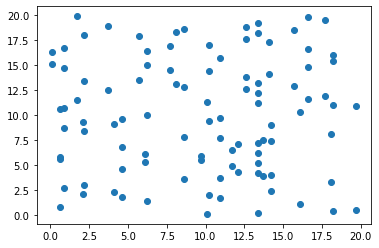

In [5]:
def x_pos(i):
    x=0.1*((9+13*i**2)%200)
    return x
def y_pos(i):
    y=0.1*((7+1327*i)%200)
    return y

x=x_pos(np.linspace(1,100,100))
y=y_pos(np.linspace(1,100,100))

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

#### g) Su rutina debe generar un gráfico que muestre las posiciones de las ciudades y la trayectoria más corta encontrada al final de la simulación. Opcionalmente puede generar una animación que se actualice cada ve que el algoritmo encuentra un camino mas corto.

Ejecutando Algoritmo...
Tiempo de ejecución: 37.15645456314087


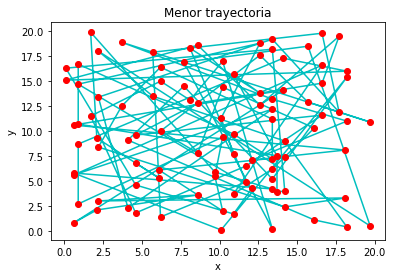

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
def Optimización(x,y):
    
    #Parámetros iniciales
    global tamano_poblacion
    tamano_poblacion=200
    p_mut=0.01
    global nGeneraciones
    nGeneraciones=2000
    valores_ajuste=np.zeros(tamano_poblacion)
    print('Ejecutando Algoritmo...')
    
    #Contador de tiempo
    inicio=time.time()
    
    ##################################
    #Inicializar poblacion
    poblacion=inicializacion_poblacion(tamano_poblacion)
    
    ##################################
    #Mejores indicadores
    promedios_valores_Gen=[]
    mejor_individuo_gen=[]
    mejores_valores_ajuste_pob=[]
    
    #Iterción para cada generación
    for iGen in range(nGeneraciones):
        valores_ajuste_poblacion=[]
        ##########################
        #Iteracion para cada cromosoma
        for j in range(len(poblacion[0])):
            dato_ajuste=ValorAjuste(poblacion[j],x,y)      #Dato ajuste por cromosoma
            valores_ajuste_poblacion.append(dato_ajuste)   #Agrega los valores de ajuste por cromosoma a una lista
        
        #########################
        
        promedios_valores_Gen.append(np.mean(valores_ajuste_poblacion))    #Guarda el promedio de los valores de ajuste
        mejor_individuo_gen.append(poblacion[valores_ajuste_poblacion.index(np.max(valores_ajuste_poblacion))])   #Agrega el mejor individuo de cada gen.
        mejores_valores_ajuste_pob.append(np.max(valores_ajuste_poblacion))    #Guarda el mejor ajuste por geberacion
        
        poblacionTemporal=poblacion.copy()
        
        #Efectua la mutacion
        for k in range(len(poblacion[0])):
            cromosmaOriginal=poblacionTemporal[k].copy()
            cromosomaMutado=intercambio(cromosmaOriginal,p_mut)
            
            poblacionTemporal[k]=cromosomaMutado.copy()
        
        #######################
        
        poblacion=poblacionTemporal
        
    fin=time.time() #Fin del contador de tiempo
    print('Tiempo de ejecución: '+str(fin-inicio))
    return  promedios_valores_Gen, mejor_individuo_gen,mejores_valores_ajuste_pob
 
    
promedios_valores_Gen, mejor_individuo_gen,mejores_valores_ajuste_pob= Optimización(x,y)

a=mejor_individuo_gen[-1] #Mejor individuo
def grafica_trayectoria(x,y,cromosoma):
    xs=[]
    ys=[]
    for i in range(0,len(cromosoma)):
        xs.append(x[cromosoma[i]])
        ys.append(y[cromosoma[i]])
    plt.plot(xs,ys,'c-')
    plt.plot(xs,ys,'ro')
    plt.title('Menor trayectoria')
    plt.xlabel('x')
    plt.ylabel('y')
    
    return xs,ys
xs,ys=grafica_trayectoria(x,y,a) #Se grafica el recorrido del mejor individuo

#### h) Genere un gráfico que muestre los valores de ajuste promedio de la población y el ajuste del individuo mejor adaptado por cada generación de la simulación. Comente acerca del comportamiento de los valores de ajuste durante la simulación. Además mencione los parámetros utilizados en la simulación y su posible influencia en el comportamiento observado de los valores de ajuste.

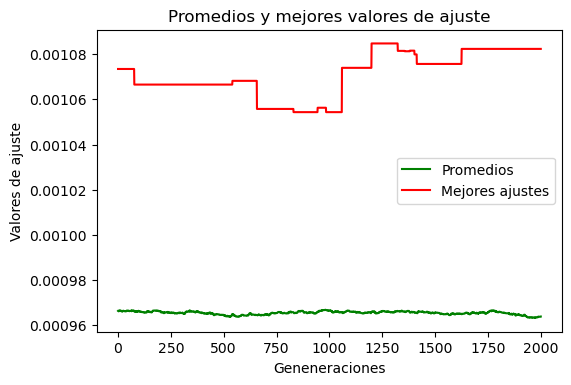

El mejor valor de ajuste es: 0.001084735980187008
La distancia más pequeña encontrada es de: 921.8833137881169
El mejor individuo de la problacion (secuencia de ciudades): 
 [9, 77, 2, 19, 67, 29, 56, 27, 24, 78, 15, 83, 49, 52, 87, 45, 40, 35, 32, 55, 54, 0, 7, 44, 86, 16, 89, 64, 47, 30, 72, 58, 46, 85, 25, 65, 74, 88, 31, 61, 36, 41, 62, 81, 26, 48, 37, 70, 50, 33, 90, 14, 94, 69, 79, 99, 20, 1, 18, 23, 80, 59, 39, 57, 38, 71, 76, 96, 43, 82, 22, 6, 66, 53, 92, 3, 8, 11, 68, 84, 5, 13, 73, 98, 63, 28, 10, 51, 91, 93, 34, 60, 21, 12, 4, 75, 95, 17, 97, 42]


In [19]:
###################  Grafica promedios de valor de ajuste por poblacion  y mejores valoes de ajuste por poblacion#########
fig1,ax=plt.subplots(dpi=100)
ax.plot(np.linspace(0,nGeneraciones,nGeneraciones),promedios_valores_Gen,'g-')
ax.plot(np.linspace(0,nGeneraciones,nGeneraciones),mejores_valores_ajuste_pob,'r-')
ax.set_title('Promedios y mejores valores de ajuste')
ax.set_xlabel('Geneneraciones')
ax.set_ylabel('Valores de ajuste')
ax.legend(['Promedios','Mejores ajustes'])  
plt.show()

print("El mejor valor de ajuste es: "+str(np.max(mejores_valores_ajuste_pob)))
print("La distancia más pequeña encontrada es de: "+str(1/float(np.max(mejores_valores_ajuste_pob)))) #Escoger si tomar el ultimo o el mejor valor
print("El mejor individuo de la problacion (secuencia de ciudades): \n",mejor_individuo_gen[-1])


##### Condiciones utilizadas:
* Tamaño Población=200
* Probabilidad de mutación = 0.20
* Número de generaciones = 2000

Con respecto a los mejores valores de ajuste por generación, se observa un comportamiento inestable que oscila alrededor de aproximadamente 0.001075, esto se debe a la sola aplicación del operador mutación realiza operaciones aleatorias sobre los cromosomas con una probilidad establecida, esta implementación es similar a intentar resolver el problema por un método de fuerza bruta.

Los promedios por generación también parecen tener un comportamiento oscilante entre 0.000975 y 0.000950, la palicación del operador mutación hace converger el promedio de datos a este intervalo.


### Una población de individuos completamente aleatorios pone al AG en desventaja desde el inicio en este problema. Genere una versión modificada del AG (AGM), e investigue su rendimiento frente a la implementación estándar:

#### a) Modifique la función de inicialización del AG para que genere la poblacióninicial de la siguiente manera: para cada individuo se selecciona un punto departida aleatorio, a partir del nodo seleccionado se forma trayecto donde el nodo siguiente es siempre el más cercano.

In [8]:
from random import sample
import numpy as np
import matplotlib.pyplot as plt

def distancia_entre_ciudades(ciudad_I,ciudad_II): #Función para clcular distancia entre 2 ciudades a partir del indice de las coordenadas
    distancia = ((y[ciudad_I]-y[ciudad_II])**2 +(x[ciudad_I]-x[ciudad_II])**2)**(1/2)
    return 1/distancia #Retorna el inverso de la distancia

def inicializacion_poblacion_mod(tamaño): #Requiere el tamaño de la población
    poblacion=[]
    ciudad = 0
    for i in range(0,tamaño):
        cromosoma= []
        cromosoma.append(np.random.randint(0,100))
        for j in range(0,99): #Recorre cada dato del comosoma
            valor_min = 0
            for m in range(100): #Recorre las ciudades con las que puede tener la distancia más pequeña
                if cromosoma[j] != m and m not in cromosoma: #No se desea que se repita las ciudades y así la distancia es diferente de cero
                    distancia = distancia_entre_ciudades(cromosoma[j],m)
                    if distancia > valor_min: #Verifica si es la distancia más pequeña
                        valor_min = distancia
                        ciudad = m
            cromosoma.append(ciudad)
        poblacion.append(cromosoma)
    return poblacion

#### b) Operador de mutación: Aplique el operador mutación a esta población inicial de la siguiente manera: deje el primer individuo sin cambios, pero aplique de 3 a 10 mutaciones al resto de la población.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def Optimización(x,y):
    
    #Parámetros iniciales
    global tamano_poblacion
    tamano_poblacion=200
    p_mut=0.01
    global nGeneraciones
    nGeneraciones=2000
    valores_ajuste=np.zeros(tamano_poblacion)
    print('Ejecutando Algoritmo...')
    
    #Contador de tiempo
    inicio=time.time()
    
    ##################################
    #Inicializar poblacion
    poblacion=inicializacion_poblacion_mod(tamano_poblacion)
    
    ##################################
    #Mejores indicadores
    promedios_valores_Gen=[]
    mejor_individuo_gen=[]
    mejores_valores_ajuste_pob=[]
    
    #Iterción para cada generación
    for iGen in range(nGeneraciones):
        valores_ajuste_poblacion=[]
        ##########################
        #Iteracion para cada cromosoma
        for j in range(len(poblacion[0])):
            dato_ajuste=ValorAjuste(poblacion[j],x,y)      #Dato ajuste por cromosoma
            valores_ajuste_poblacion.append(dato_ajuste)   #Agrega los valores de ajuste por cromosoma a una lista
        
        #########################
        
        promedios_valores_Gen.append(np.mean(valores_ajuste_poblacion))    #Guarda el promedio de los valores de ajuste
        mejor_individuo_gen.append(poblacion[valores_ajuste_poblacion.index(np.max(valores_ajuste_poblacion))])   #Agrega el mejor individuo de cada gen.
        mejores_valores_ajuste_pob.append(np.max(valores_ajuste_poblacion))    #Guarda el mejor ajuste por geberacion
        
        poblacionTemporal=poblacion.copy()
        
        #Efectua la mutacion
        for k in range(1,tamano_poblacion):    ######### Se ejecuta la mutación de 3 a 10 de forma aleatoria
            for l in range(0,np.random.randint(3,11)):
                cromosmaOriginal=poblacionTemporal[k].copy()
                cromosomaMutado=intercambio(cromosmaOriginal,p_mut)
            
                poblacionTemporal[k]=cromosomaMutado.copy()
        
        #######################
        
        poblacion=poblacionTemporal
        
    fin=time.time()
    print('Tiempo de ejecución: '+str(fin-inicio))
        
    return  promedios_valores_Gen, mejor_individuo_gen,mejores_valores_ajuste_pob
 
    
promedios_valores_Gen, mejor_individuo_gen,mejores_valores_ajuste_pob= Optimización(x,y)

Ejecutando Algoritmo...
Tiempo de ejecución: 66.021653175354


#### c) Una vez que la población inicial ha sido definida, ejecute el AGM usando los operadores descritos en la parte anterior, hasta obtener un resultado satisfactorio.


In [13]:
print("El mejor valor de ajuste es: "+str(np.max(mejores_valores_ajuste_pob)))
print("La distancia más pequeña encontrada es de: "+str(1/float(np.max(mejores_valores_ajuste_pob)))) #Escoger si tomar el ultimo o el mejor valor


El mejor valor de ajuste es: 0.005271876388859951
La distancia más pequeña encontrada es de: 189.68578286719864


#### d) Use su AGM para encontrar el camino más corto entre el conjunto de ciudades cuyas coordenadas fueron generadas mediante las funciones (1) y (2).


In [14]:
print("El mejor individuo de la problacion (secuencia de ciudades): \n",mejor_individuo_gen[-1])

El mejor individuo de la problacion (secuencia de ciudades): 
 [40, 92, 7, 81, 48, 59, 62, 86, 12, 39, 50, 17, 99, 36, 3, 0, 33, 63, 8, 90, 5, 87, 76, 68, 49, 30, 22, 11, 93, 35, 65, 98, 79, 27, 71, 19, 95, 6, 91, 58, 72, 75, 23, 45, 67, 4, 15, 78, 34, 64, 94, 83, 20, 28, 47, 66, 55, 88, 25, 61, 37, 10, 73, 51, 70, 84, 29, 18, 89, 26, 97, 1, 42, 56, 9, 31, 53, 80, 69, 77, 96, 44, 14, 74, 52, 41, 85, 82, 60, 38, 16, 13, 32, 43, 57, 24, 46, 2, 54, 21]


#### e) Su rutina debe generar un gráfico que muestre las posiciones de las ciudades
y la trayectoria más corta encontrada al final de la simulación. Opcionalmente
puede generar una animación que se actualice cada ve que el
algoritmo encuentra un camino mas corto.

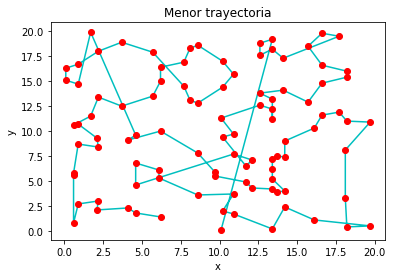

In [15]:
a=mejor_individuo_gen[-1]  #Mejor individuo
def grafica_trayectoria(x,y,cromosoma):
    xs=[]
    ys=[]
    for i in range(0,len(cromosoma)):
        xs.append(x[cromosoma[i]])
        ys.append(y[cromosoma[i]])
    plt.plot(xs,ys,'c-')
    plt.plot(xs,ys,'ro')
    plt.title('Menor trayectoria')
    plt.xlabel('x')
    plt.ylabel('y')
    
    return xs,ys
xs,ys=grafica_trayectoria(x,y,a)

#### f ) Genere un gráfico que muestre los valores de ajuste promedio de la poblacióny el ajuste del individuo mejor adaptado por cada generación de lasimulación. Comente acerca del comportamiento de los valores de ajuste durante la simulación. Además mencione los parámetros utilizados en la simulación y su posible influencia en el comportamiento observado de los valores de ajuste.

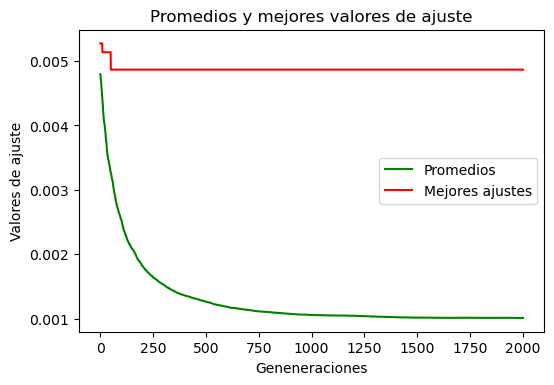

In [16]:
###################  Grafica promedios de valor de ajuste por poblacion  y mejores valoes de ajuste por poblacion#########
fig1,ax=plt.subplots(dpi=100)
ax.plot(np.linspace(0,nGeneraciones,nGeneraciones),promedios_valores_Gen,'g-')
ax.plot(np.linspace(0,nGeneraciones,nGeneraciones),mejores_valores_ajuste_pob,'r-')
ax.set_title('Promedios y mejores valores de ajuste')
ax.set_xlabel('Geneneraciones')
ax.set_ylabel('Valores de ajuste')
ax.legend(['Promedios','Mejores ajustes'])  
plt.show()

Los valores de ajuste promedio por poblacion decaen de forma casi exponcial debido a que cada cromosoma (secuencia de ciudades a visitar) es mutado lo que altera el promedio (hay mas valores con menores valores de ajuste). Sin embargo, se mantiene el valor de ajuste dentro de la misma magnitud $10^-3$. Por otro lado, si se aumenta la probabilidad de mutación, los valores de ajuste se hacen mucho más bajos de forma que la distancia recorrida es mayor y el algoritmo evolucionario falla. Luego, los mejores valores de ajuste por generacion son casi iguales, salvo a la condicion incial, esto porque la primera generacion tiene un cromosoma mejor que la condicion incial de forma que se tiene un valor de ajuste alto, sin embargo, la mutacion en las siguientes generaciones altera los cromosomas de forma que se reduce el valor de ajuste lo suficiente como para que la condicion inicial prevalesca como el mejor ajuste, ya que este no se muta (debido al enunciado de la tarea).

#### g) Basado en los gráficos de evolución de los valores de ajuste, los tiempos de ejecución y los parametros seleccionados para cada implementación de algoritmo genético estandar; compare el rendimiento del AG contra el rendimiento del AGM.

El tiempo de ejecución es mayor en la el AGM debido a que en este se ejecutan de 3 a 10 veces el operador de mutación, el AG tiene un tiempo de ejecución de alrededor de 21.6 s y el AGM tiene un tiempo de ejecución de 63.7 s. El AGM tiene un mejor comportamiento y brinda una solución mejor que el AG debido a que cuenta con una condición inicial mejor. 

Se utilizó como probabilidad de mutación $\frac{1}{nGen}$ y con un número de población de 200, se observa que con probabilidad de mutación mayor los valores tienen a oscilar aún más